In [0]:
%tensorflow_version 1.x

In [17]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [0]:
import numpy as np
import os
import itertools
from tqdm import tqdm
from random import shuffle
import cv2
import imp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU
from tensorflow.keras import optimizers
from tensorflow.keras.models import load_model


In [19]:
!unzip "drive/My Drive/TreeClassification/train.zip"


Archive:  drive/My Drive/TreeClassification/train.zip
replace train/Ashoka1(10).png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: train/Ashoka1(10).png   
  inflating: train/Ashoka1(11).png   
  inflating: train/Ashoka1(12).png   
  inflating: train/Ashoka1(13).png   
  inflating: train/Ashoka1(14).png   
  inflating: train/Ashoka1(15).png   
  inflating: train/Ashoka1(16).png   
  inflating: train/Ashoka1(17).png   
  inflating: train/Ashoka1(18).png   
  inflating: train/Ashoka1(19).png   
  inflating: train/Ashoka1(20).png   
  inflating: train/Ashoka1(21).png   
  inflating: train/Ashoka1(22).png   
  inflating: train/Ashoka1(23).png   
  inflating: train/Ashoka1(24).png   
  inflating: train/Ashoka1(25).png   
  inflating: train/Ashoka1(26).png   
  inflating: train/Ashoka1(27).png   
  inflating: train/Ashoka1(28).png   
  inflating: train/Ashoka1(37).png   
  inflating: train/Ashoka1(38).png   
  inflating: train/Ashoka1(39).png   
  inflating: train/Ashoka1(40).png   
 

In [20]:
!unzip "drive/My Drive/TreeClassification/test.zip"

Archive:  drive/My Drive/TreeClassification/test.zip
replace test/Ashoka1(1).png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test/Ashoka1(1).png     
  inflating: test/Ashoka1(2).png     
  inflating: test/Ashoka1(3).png     
  inflating: test/Ashoka1(4).png     
  inflating: test/Ashoka1(5).png     
  inflating: test/Ashoka1(6).png     
  inflating: test/Ashoka1(7).png     
  inflating: test/Camellia(13).png   
  inflating: test/Camellia(2).png    
  inflating: test/Camellia(23).png   
  inflating: test/Camellia(30).png   
  inflating: test/Camellia(33).png   
  inflating: test/Camellia(43).png   
  inflating: test/Camellia(50).png   
  inflating: test/Chirstmas tree(12).png  
  inflating: test/Chirstmas tree(13).png  
  inflating: test/Chirstmas tree(14).png  
  inflating: test/Chirstmas tree(2).png  
  inflating: test/Chirstmas tree(3).png  
  inflating: test/Chirstmas tree(4).png  
  inflating: test/Cycas revoluta(12).png  
  inflating: test/Cycas revoluta(2).png  
  infl

In [21]:
import sys
sys.path.append("drive/My Drive/TreeClassification")
import ibin_dataloader

  5%|▍         | 26/576 [00:00<00:02, 257.22it/s]

Mounted at /content/drive
No of species to be classified =  14
List of Species = 
 ['Ashoka1', 'Camellia', 'Chirstmas tree', 'Cycas revoluta', 'Guava', 'Jarul', 'Laurel Magnolia', 'Litchi', 'Madanmast', 'Mango', 'Mehndi', 'Rose', 'Rubbertree', 'Silver oak']
Litchi(45).png
Litchi(20).png
Ashoka1(18).png
Madanmast(13).png
Rubbertree(19).png
Jarul(29).png
Litchi(6).png
Chirstmas tree(50).png
Mango(3).png
Rose(15).png
Rose(23).png
Jarul(45).png
Silver oak(29).png
Ashoka1(53).png
Litchi(5).png
Laurel Magnolia(25).png
Rubbertree(29).png
Rose(19).png
Cycas revoluta(21).png
Silver oak(14).png
Chirstmas tree(7).png
Ashoka1(38).png
Jarul(7).png
Ashoka1(13).png
Silver oak(12).png
Guava(46).png
Camellia(31).png
Litchi(29).png
Rose(26).png
Laurel Magnolia(48).png
Rubbertree(5).png
Chirstmas tree(16).png
Mango(21).png
Silver oak(25).png
Rubbertree(9).png
Camellia(21).png
Guava(3).png
Guava(23).png
Jarul(15).png
Guava(8).png
Laurel Magnolia(50).png
Chirstmas tree(31).png
Cycas revoluta(31).png
Guava(

 22%|██▏       | 128/576 [00:00<00:01, 343.75it/s]

Chirstmas tree(45).png
Rubbertree(20).png
Mango(23).png
Rubbertree(36).png
Guava(4).png
Chirstmas tree(32).png
Laurel Magnolia(17).png
Camellia(12).png
Madanmast(40).png
Guava(33).png
Litchi(28).png
Litchi(44).png
Madanmast(20).png
Ashoka1(44).png
Rose(8).png
Madanmast(21).png
Ashoka1(42).png
Laurel Magnolia(44).png
Rubbertree(24).png
Chirstmas tree(22).png
Guava(24).png
Jarul(49).png
Rubbertree(18).png
Silver oak(8).png
Rubbertree(21).png
Cycas revoluta(23).png
Laurel Magnolia(34).png
Cycas revoluta(7).png
Camellia(26).png
Litchi(8).png
Silver oak(26).png
Rubbertree(10).png
Chirstmas tree(27).png
Rubbertree(1).png
Mango(36).png
Ashoka1(15).png
Camellia(37).png
Guava(7).png
Silver oak(37).png
Jarul(5).png
Madanmast(15).png
Silver oak(30).png
Chirstmas tree(6).png
Rose(37).png
Camellia(41).png
Rubbertree(32).png
Guava(37).png
Mehndi(39).png
Litchi(13).png
Chirstmas tree(26).png
Guava(5).png
Silver oak(40).png
Cycas revoluta(27).png
Guava(11).png
Madanmast(44).png
Silver oak(19).png
Jaru

 40%|████      | 233/576 [00:00<00:00, 416.02it/s]

Silver oak(42).png
Litchi(17).png
Chirstmas tree(25).png
Laurel Magnolia(49).png
Madanmast(18).png
Ashoka1(57).png
Litchi(33).png
Rose(11).png
Litchi(30).png
Laurel Magnolia(24).png
Laurel Magnolia(6).png
Guava(15).png
Camellia(10).png
Rubbertree(28).png
Laurel Magnolia(7).png
Madanmast(48).png
Cycas revoluta(44).png
Rubbertree(40).png
Rose(30).png
Silver oak(10).png
Laurel Magnolia(40).png
Litchi(48).png
Jarul(37).png
Chirstmas tree(30).png
Litchi(41).png
Mango(1).png
Ashoka1(56).png
Jarul(46).png
Guava(40).png
Camellia(36).png
Rubbertree(27).png
Laurel Magnolia(27).png
Ashoka1(46).png
Laurel Magnolia(14).png
Jarul(42).png
Cycas revoluta(30).png
Cycas revoluta(33).png
Silver oak(21).png
Mehndi(4).png
Camellia(8).png
Jarul(41).png
Cycas revoluta(15).png
Guava(17).png
Guava(31).png
Mango(13).png
Silver oak(43).png
Laurel Magnolia(3).png
Mehndi(34).png
Madanmast(27).png
Rubbertree(23).png
Silver oak(36).png
Camellia(7).png
Mango(10).png
Guava(48).png
Jarul(6).png
Silver oak(39).png
Jarul

 59%|█████▊    | 338/576 [00:00<00:00, 464.06it/s]

Litchi(21).png
Cycas revoluta(10).png
Camellia(20).png
Chirstmas tree(47).png
Mehndi(18).png
Camellia(9).png
Ashoka1(21).png
Laurel Magnolia(11).png
Rubbertree(35).png
Cycas revoluta(43).png
Silver oak(35).png
Rubbertree(34).png
Silver oak(4).png
Rubbertree(43).png
Guava(27).png
Mango(16).png
Ashoka1(50).png
Mehndi(26).png
Ashoka1(22).png
Ashoka1(12).png
Litchi(35).png
Madanmast(8).png
Silver oak(28).png
Rose(25).png
Rose(33).png
Madanmast(9).png
Mehndi(3).png
Mehndi(20).png
Jarul(11).png
Cycas revoluta(8).png
Laurel Magnolia(5).png
Jarul(44).png
Mehndi(17).png
Mehndi(11).png
Mehndi(28).png
Silver oak(9).png
Cycas revoluta(19).png
Cycas revoluta(20).png
Litchi(7).png
Cycas revoluta(48).png
Laurel Magnolia(31).png
Madanmast(36).png
Camellia(19).png
Litchi(1).png
Guava(47).png
Litchi(50).png
Rubbertree(47).png
Chirstmas tree(23).png
Cycas revoluta(24).png
Chirstmas tree(11).png
Chirstmas tree(35).png
Litchi(11).png
Ashoka1(9).png
Cycas revoluta(36).png
Madanmast(50).png
Guava(10).png
Man

 77%|███████▋  | 445/576 [00:00<00:00, 498.28it/s]

Rose(7).png
Rubbertree(46).png
Rose(17).png
Laurel Magnolia(16).png
Rubbertree(38).png
Rubbertree(48).png
Mango(8).png
Cycas revoluta(9).png
Jarul(9).png
Jarul(16).png
Chirstmas tree(41).png
Camellia(47).png
Madanmast(38).png
Mango(17).png
Camellia(49).png
Guava(49).png
Madanmast(43).png
Silver oak(16).png
Rubbertree(7).png
Silver oak(23).png
Madanmast(3).png
Mango(14).png
Jarul(39).png
Litchi(16).png
Cycas revoluta(11).png
Litchi(46).png
Madanmast(49).png
Madanmast(25).png
Mango(7).png
Rose(16).png
Guava(38).png
Madanmast(23).png
Camellia(6).png
Silver oak(18).png
Ashoka1(51).png
Rose(14).png
Rose(28).png
Litchi(43).png
Mehndi(36).png
Jarul(25).png
Guava(35).png
Cycas revoluta(42).png
Rubbertree(41).png
Jarul(24).png
Camellia(11).png
Jarul(35).png
Chirstmas tree(29).png
Madanmast(41).png
Chirstmas tree(28).png
Camellia(48).png
Guava(50).png
Guava(18).png
Chirstmas tree(9).png
Chirstmas tree(18).png
Cycas revoluta(26).png
Litchi(49).png
Rubbertree(22).png
Mehndi(21).png
Ashoka1(59).png

100%|██████████| 576/576 [00:01<00:00, 495.56it/s]

Cycas revoluta(40).png
Jarul(19).png
Rose(13).png
Litchi(34).png
Litchi(25).png
Rose(6).png
Rose(5).png
Mehndi(35).png
Laurel Magnolia(23).png
Rose(35).png
Guava(16).png
Cycas revoluta(16).png
Rose(38).png
Ashoka1(58).png
Chirstmas tree(44).png
Madanmast(45).png
Ashoka1(14).png
Litchi(3).png
Madanmast(29).png
Camellia(15).png
Jarul(17).png
Camellia(38).png
Madanmast(31).png
Madanmast(19).png
Jarul(13).png
Laurel Magnolia(45).png
Laurel Magnolia(46).png
Silver oak(17).png
Ashoka1(20).png
Litchi(31).png
Jarul(8).png
Mango(28).png
Chirstmas tree(21).png
Laurel Magnolia(15).png
Mango(5).png
Ashoka1(11).png
Camellia(22).png
Chirstmas tree(1).png
Mango(6).png
Guava(39).png
Camellia(3).png
Jarul(30).png
Silver oak(27).png
Laurel Magnolia(29).png
Camellia(39).png
Jarul(40).png
Guava(21).png
Mango(18).png
Litchi(39).png
Guava(44).png
Rose(20).png
Ashoka1(41).png
Rubbertree(37).png
Silver oak(7).png
Rose(34).png
Cycas revoluta(17).png
Camellia(27).png
Ashoka1(26).png
Guava(1).png
Litchi(19).png



100%|██████████| 76/76 [00:00<00:00, 705.25it/s]

Train_X =  <class 'numpy.ndarray'> (3456, 28, 28, 3)
Train_Y =  <class 'numpy.ndarray'> (3456, 14)
Mehndi(32).png
Ashoka1(4).png
Mango(2).png
Chirstmas tree(14).png
Camellia(43).png
Mehndi(12).png
Ashoka1(5).png
Camellia(50).png
Rubbertree(3).png
Litchi(32).png
Jarul(23).png
Ashoka1(6).png
Cycas revoluta(2).png
Chirstmas tree(13).png
Guava(2).png
Silver oak(3).png
Rose(12).png
Laurel Magnolia(22).png
Jarul(2).png
Mango(22).png
Litchi(2).png
Madanmast(42).png
Litchi(12).png
Mango(12).png
Laurel Magnolia(2).png
Rubbertree(4).png
Mango(32).png
Camellia(2).png
Cycas revoluta(12).png
Chirstmas tree(2).png
Camellia(30).png
Mehndi(22).png
Cycas revoluta(32).png
Chirstmas tree(3).png
Rose(2).png
Rubbertree(13).png
Camellia(23).png
Mehndi(2).png
Madanmast(2).png
Silver oak(22).png
Ashoka1(7).png
Cycas revoluta(22).png
Cycas revoluta(3).png
Rubbertree(15).png
Jarul(33).png
Guava(22).png
Jarul(3).png
Silver oak(45).png
Ashoka1(1).png
Rose(32).png
Laurel Magnolia(12).png
Mango(33).png
Rose(22).png

In [0]:
IMG_SIZE = ibin_dataloader.IMG_SIZE


In [0]:
# CNN model
model = tf.keras.Sequential()

In [24]:
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='sigmoid', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='sigmoid'))
model.add(MaxPooling2D(pool_size=2))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
#model.add(Dropout(0.5))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='sigmoid'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))

In [0]:
# model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=2))

# model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='sigmoid'))
# model.add(MaxPooling2D(pool_size=2))

# model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='sigmoid'))
# model.add(MaxPooling2D(pool_size=2))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(1024, activation='sigmoid'))
model.add(Dropout(0.5))

In [0]:
#model.add(Dense(128, activation='sigmoid'))
#model.add(Dropout(0.5))

In [0]:
model.add(Dense(ibin_dataloader.num_classes, activation='softmax'))

In [31]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [0]:
# Run the model
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [34]:
hist = model.fit(ibin_dataloader.x_train, ibin_dataloader.y_train, batch_size=32, validation_split=0.1, shuffle=True, epochs=2)

Train on 3110 samples, validate on 346 samples
Epoch 1/2
3110/3110 [==============================] - 11s 4ms/sample - loss: 2.9312 - acc: 0.0669 - val_loss: 2.6989 - val_acc: 0.0636
Epoch 2/2
3110/3110 [==============================] - 11s 3ms/sample - loss: 2.8718 - acc: 0.0701 - val_loss: 2.6460 - val_acc: 0.0607


In [0]:
# Get loss & accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']

In [36]:
# Evaluate the model 
score = model.evaluate(ibin_dataloader.x_test, ibin_dataloader.y_test, batch_size=32)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

76/76 [==============================] - 0s 786us/sample - loss: 2.6601 - acc: 0.0789
acc: 7.89%


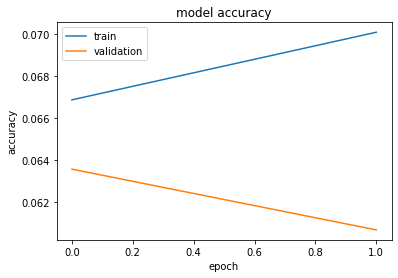

In [37]:
#  Accuracy Plot
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:

# Save the model
model.save('ibin_4classes.h5')